In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [2]:
from scipy import stats

In [3]:
import pymc as pm
import arviz as az
az.style.use('arviz-darkgrid')

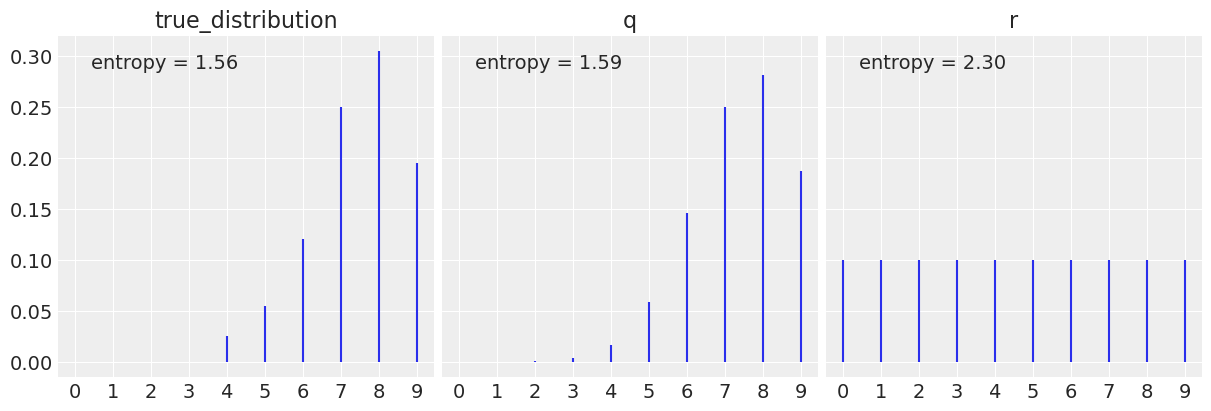

In [4]:
np.random.seed(912)
x = range(0, 10)
q = stats.binom(10, 0.75)
r = stats.randint(0, 10)

true_distribution = [list(q.rvs(200)).count(i) / 200 for i in x]

q_pmf = q.pmf(x)
r_pmf = r.pmf(x)

_, axes = plt.subplots(1,
                     3,
                     figsize=(12, 4),
                     sharey=True,
                     constrained_layout=True)

for ax, dist, label in zip(axes.flatten(), [true_distribution, q_pmf, r_pmf],
                           ['true_distribution', 'q', 'r']):
    ax.vlines(x, 0, dist, label=f'entropy = {stats.entropy(dist):.2f}')
    ax.set(title=label, xticks=x)
    ax.legend(loc=2, handlelength=0)

# plt.savefig('images/ch9/entropy.png')
plt.show()

In [5]:
stats.entropy(true_distribution, q_pmf), stats.entropy(true_distribution, r_pmf)

(0.009657896086383608, 0.7394593875511319)

In [6]:
stats.entropy(r_pmf, q_pmf), stats.entropy(q_pmf, r_pmf)

(2.7569296581563676, 0.7154903060638592)